# Transcription Factor Footprinting

Visualize Transcription Factor Footprints as described by <a href=https://www.nature.com/articles/s41467-020-18035-1>Bentsen et al, 2020</a>.

In [1]:
library(Signac)
library(Seurat)
library(BSgenome.Mmusculus.UCSC.mm10)
library(motifmatchr)
library(JASPAR2020)
library(TFBSTools)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching SeuratObject


Attaching package: 'Seurat'


The following object is masked from 'package:Signac':

    FoldChange


Loading required package: BSgenome

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Posit

In [2]:
brain <- readRDS("./adult_mouse_brain/Outputs/brain_motif.rds")
DefaultAssay(brain) <- 'ATAC'

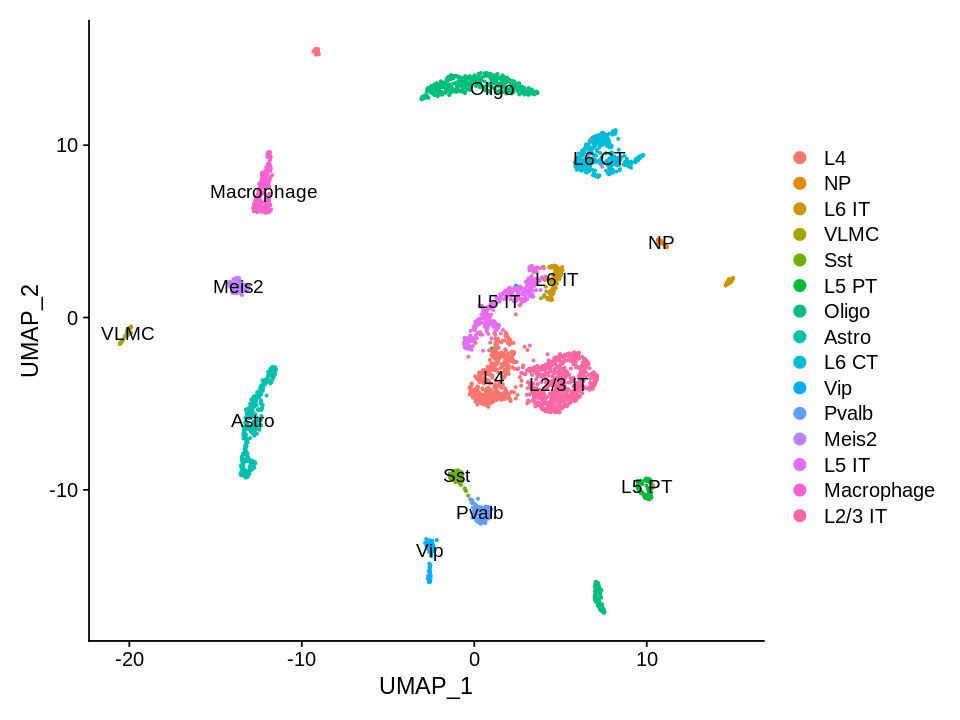

In [3]:
options(repr.plot.width=8, repr.plot.height=6)
DimPlot(brain, label = TRUE)

In [4]:
# gather the footprinting information for sets of motifs
brain <- Footprint(object = brain,
                   motif.name = c("NR4A2", "Esrrg", "Tcf12"),
                   genome = BSgenome.Mmusculus.UCSC.mm10)

Computing Tn5 insertion bias

Extracting reads in requested region

Computing observed Tn5 insertions per base

Computing base composition at motif sites

Computing expected Tn5 insertions per base

Finding + strand cut sites

Finding - strand cut sites

Computing observed Tn5 insertions per base

Computing base composition at motif sites

Computing expected Tn5 insertions per base

Finding + strand cut sites

Finding - strand cut sites

Computing observed Tn5 insertions per base

Computing base composition at motif sites

Computing expected Tn5 insertions per base

Finding + strand cut sites

Finding - strand cut sites



Warning message:
"Removed 7620 rows containing missing values (geom_label_repel)."
Warning message:
"Removed 7650 rows containing missing values (geom_label_repel)."
Warning message:
"Removed 7665 rows containing missing values (geom_label_repel)."


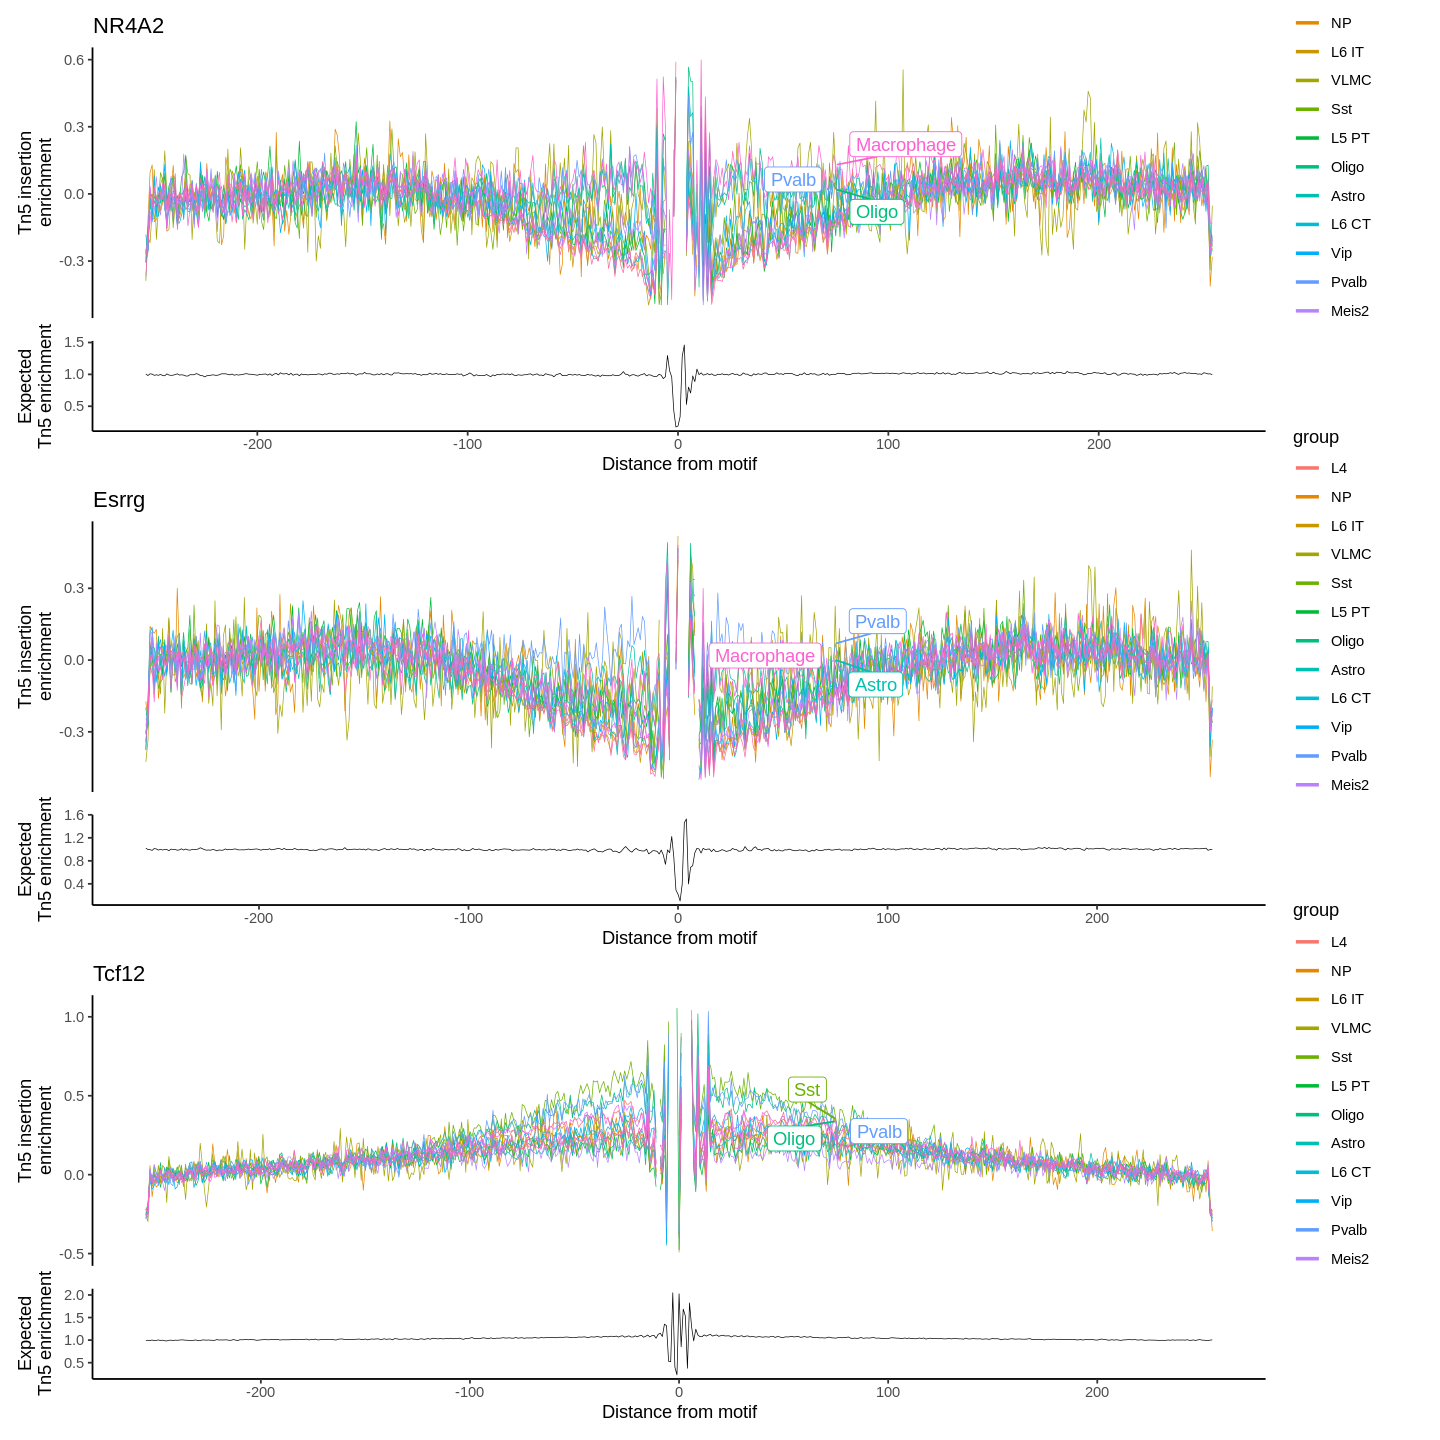

In [5]:
# plot the footprint data for each group of cells
options(repr.plot.width=12, repr.plot.height=12)
p2 <- PlotFootprint(brain, features = c("NR4A2", "Esrrg", "Tcf12"))
p2 + patchwork::plot_layout(ncol = 1)